In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, requests, shutil, os
from urllib import request, error
from skimage import io
from skimage.transform import resize
import time

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1057: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1057: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


# Load the data set

* There are totally 1,225,029 training images and 117,703 test images. 
* Totoally 14,951 landmarks

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print('Train:\t\t', train.shape)
print('Test:\t\t', test.shape)

print('Landmarks:\t', len(train['landmark_id'].unique()))

Train:		 (1225029, 3)
Test:		 (117703, 2)
Landmarks:	 14951


In [4]:
train.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


# Data Exploration

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


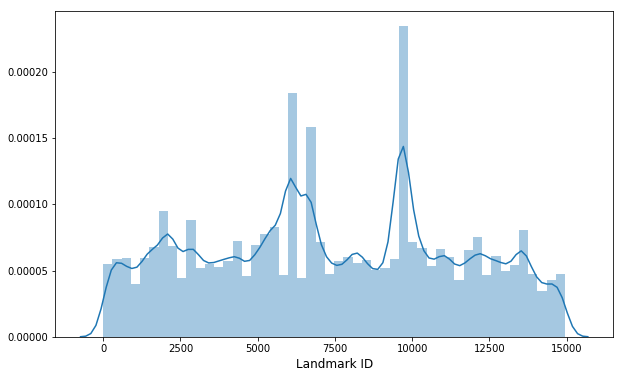

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train['landmark_id'], ax=ax)
ax.set_xlabel('Landmark ID', fontsize=12)
plt.show()

In [6]:
# Group data according unique landmark_id
grouped = train[['landmark_id', 'id']].groupby('landmark_id').count().reset_index()
grouped = grouped.sort_values('id', ascending=False)
grouped = grouped.rename(columns={'id': 'count'}).reset_index(drop=True)

In [7]:
grouped.head()

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271


In [8]:
grouped.tail()

,landmark_id,count
14946,11514,1
14947,4334,1
14948,6261,1
14949,6845,1
14950,7916,1


In [9]:
len(grouped[grouped['count'] < 10]) / len(grouped)

0.41234700020065546

# Download Images

In [10]:
def fetch_image(url):
    """ Get image from given url """
    response=requests.get(url, stream=True)
    
    with open('./data/image.jpg', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
        
    del response

In [ ]:
# Download images to ./train/
urls = train['url'].values
idx = 0
t0 = time.time()

# Loop through urls to download images
for url in urls:
    # Check if already downloaded
    if os.path.exists('./data/train_images/' + str(idx) + '.jpg'):
        idx += 1
        continue
        
    # Get image from url
    fetch_image(url)
    os.rename('./data/image.jpg', './data/train_images/'+ str(idx) + '.jpg')
    
    # Helpful information
    if idx % 100000 == 0:
        t = time.time() - t0
        print('\nProcess: {:9d}'.format(idx), '   Used time: {} s'.format(np.round(t, 0)))
        t0 = time.time()
    if idx % 1250 == 0:
        print('=', end='')
        
    # Go to next image
    idx += 1


Process:         0    Used time: 0.0 s
Process:    100000    Used time: 26481.0 s

In [ ]:
# Download images to ./test/
urls = test['url'].values
idx = 0
t0 = time.time()

# Loop through urls to download images
for url in urls:
    # Check if already downloaded
    if os.path.exists('./data/test_images/' + str(idx) + '.jpg'):
        idx += 1
        continue
        
    # Get image from url
    fetch_image(url)
    os.rename('./data/image.jpg', './data/test_images/'+ str(idx) + '.jpg')
    
    # Helpful information
    if idx % 100000 == 0:
        t = time.time() - t0
        print('\nProcess: {:9d}'.format(idx), '   Used time: {} s'.format(np.round(t, 0)))
        t0 = time.time()
    if idx % 1250 == 0:
        print('=', end='')
        
    # Go to next image
    idx += 1